# Spider Chart


In [11]:
# Importing liberaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import plotly.graph_objects as go
import plotly.express as px

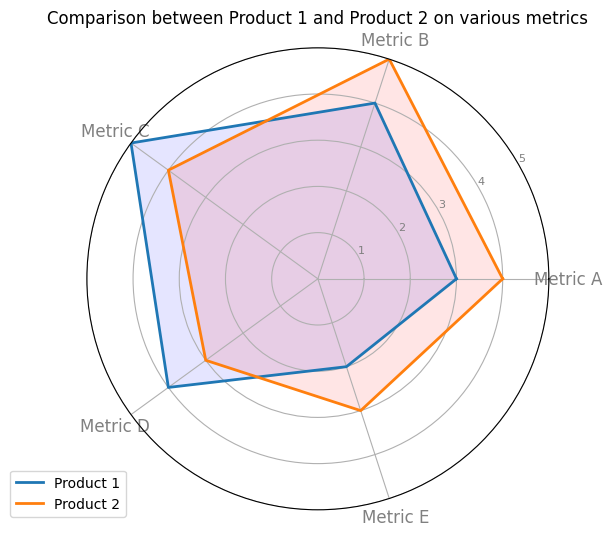

In [2]:
# Sample data
data = {
    'Metrics': ['Metric A', 'Metric B', 'Metric C', 'Metric D', 'Metric E'],
    'Product 1': [3, 4, 5, 4, 2],
    'Product 2': [4, 5, 4, 3, 3]
}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)

# Number of variables
categories = list(df['Metrics'])
N = len(categories)

# Set the angle for each metric's axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialize the spider plot
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

# Plotting for Product 1
values = df['Product 1'].tolist()
values += values[:1]  # Repeat the first value to close the circular graph
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Product 1')
ax.fill(angles, values, 'b', alpha=0.1)

# Plotting for Product 2
values = df['Product 2'].tolist()
values += values[:1]  # Repeat the first value to close the circular graph
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Product 2')
ax.fill(angles, values, 'r', alpha=0.1)

# Add the axis labels
plt.xticks(angles[:-1], categories, color='grey', size=12)
ax.set_rlabel_position(30)
plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=8)
plt.ylim(0, 5)

# Add title and legend
plt.title('Comparison between Product 1 and Product 2 on various metrics')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Save the plot to a file
plt.savefig('./plots/radar_chart.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Tree Map


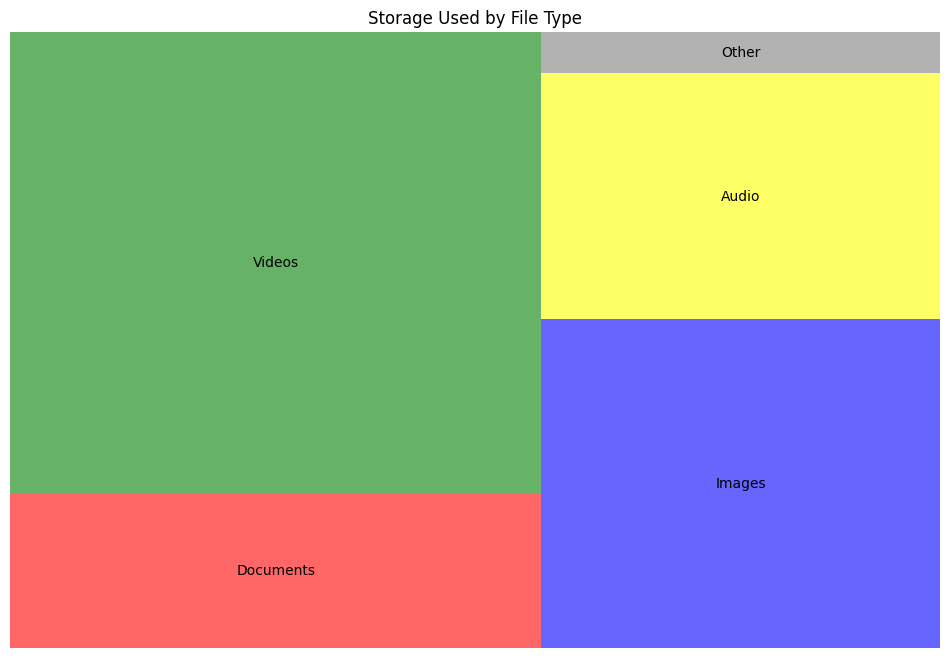

In [3]:

# Sample data
data = {
    'File Type': ['Documents', 'Videos', 'Images', 'Audio', 'Other'],
    'Storage Used (GB)': [50, 150, 80, 60, 10]
}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)

# Plotting the treemap
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'yellow', 'grey']
squarify.plot(sizes=df['Storage Used (GB)'], label=df['File Type'], color=colors, alpha=0.6)

# Add title
plt.title('Storage Used by File Type')
plt.axis('off')  # Turn off the axis

# Save the plot to a file
plt.savefig('./plots/treemap.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Geographical Maps

In [4]:

# Data for cities and their coordinates
cities = {
    'New York': [40.7128, -74.0060],
    'London': [51.5074, -0.1278],
    'Sydney': [-33.8688, 151.2093],
    'Tokyo': [35.6895, 139.6917],
    'Rio de Janeiro': [-22.9068, -43.1729]
}

# Extracting latitudes, longitudes, and city names for plotting
lats = [coords[0] for coords in cities.values()]
longs = [coords[1] for coords in cities.values()]
names = list(cities.keys())

# Creating the Scattergeo plot
fig = go.Figure(data=go.Scattergeo(
    lon = longs,
    lat = lats,
    text = names,
    mode = 'markers',
    marker = dict(
        size = 10,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        symbol = 'circle',
        line = dict(
            width=1,
            color='rgba(102, 102, 102)'
        ),
    )
))

# Setting the layout for the map
fig.update_layout(
    title = 'Cities on World Map using Plotly',
    geo = dict(
        scope='world',
        showland = True,
    )
)

# Display the map
fig.show()

# Save the map to an HTML file
fig.write_html("./plots/world_map_plotly.html")

# save as png with 300 dpi
fig.write_image("./plots/world_map_plotly.png", scale=3)

# Time series

In [7]:
# Sample time series data
data = {
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'Value': [10, 15, 7, 12, 10]
}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)

# Convert the 'Date' column to a datetime object for better handling
df['Date'] = pd.to_datetime(df['Date'])

# Creating the time series plot
fig = go.Figure(data=go.Scatter(x=df['Date'], y=df['Value'], mode='lines+markers'))

# Setting the layout for the plot
fig.update_layout(
    title='Time Series Plot using Plotly',
    xaxis_title='Date',
    yaxis_title='Value',
    xaxis=dict(showline=True, showgrid=False, showticklabels=True),
    yaxis=dict(zeroline=False, showgrid=True, showline=False, showticklabels=True),
)

# Display the plot
fig.show()

# Save the plot to an HTML file
fig.write_html("./plots/time_series_plotly.html")

# save as png
fig.write_image("./plots/time_series_plotly.png")

# Bubble Chart

In [9]:
# Sample data
data = {
    'X': [10, 20, 30, 40, 50],
    'Y': [15, 25, 35, 45, 55],
    'Size': [30, 60, 90, 120, 150],  # Determines the size of bubbles
    'Labels': ['A', 'B', 'C', 'D', 'E']
}

# Creating the bubble chart
fig = go.Figure(data=go.Scatter(
    x=data['X'],
    y=data['Y'],
    mode='markers',
    text=data['Labels'],
    marker=dict(
        size=data['Size'],
        sizemode='diameter',  # 'diameter' ensures that the size values correspond to the diameter of the bubbles
        opacity=0.6,
        color=data['Y'],  # Coloring the bubbles based on Y values
        colorscale='Viridis',
        colorbar=dict(title='Colorbar')
    )
))

# Setting the layout for the plot
fig.update_layout(
    title='Bubble Chart using Plotly',
    xaxis_title='X Values',
    yaxis_title='Y Values',
    showlegend=False
)

# Display the plot
fig.show()

# Save the plot to an HTML file
fig.write_html("./plots/bubble_chart_plotly.html")

# save png file with 300 dpi
fig.write_image("./plots/bubble_chart_plotly.png", scale=3)


# Violin Plot

A violin plot is similar to a box plot but also includes a rotated kernel density plot on each side. It provides a visualization of the distribution of the data, its probability density, and its cumulative distribution.

Here's how to create a violin plot using Plotly:

In [12]:
# Sample data
data = {
    'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Values': [10, 15, 5, 25, 20, 10, 30, 25, 5, 20, 15, 10]
}

# Creating the violin plot using plotly express
fig = px.violin(data, y="Values", x="Category", box=True, points="all")

# Setting the layout for the plot
fig.update_layout(
    title='Violin Plot using Plotly',
    yaxis_title='Values',
    xaxis_title='Category'
)

# Display the plot
fig.show()

# Save the plot to an HTML file
fig.write_html("./plots/violin_plot_plotly.html")

#save png file with 300 dpi
fig.write_image("./plots/violin_plot_plotly.png", scale=3)